In [18]:
import os
os.chdir('/home/jagust/dino/surf/')
from surf import *
%matplotlib inline

In [19]:
incl = np.load('/home/jagust/dino/surf/inclusion_mat_paths.npy')
order = np.load('/home/jagust/dino/surf/simulation_trials/order_or_removals.npy')

In [20]:
master_subject_path = "/home/jagust/dino/graph/data/mri1.5/rest/master_subject_summary.xlsx"
summary = pd.ExcelFile(master_subject_path).parse("Sheet1")

In [21]:
young_func_path = []
geno_neg, geno_pos = [], []
for path in incl:
    ss = find_subsess(path)
    age = summary[summary.Subsess == ss].values[0][3]
    if age < 40:
        young_func_path.append(path)
        geno = summary[summary.Subsess == ss].values[0][6]
        if geno in [1, 2]:
            geno_pos.append(path)
        if geno == 0:
            geno_neg.append(path)

In [22]:
# # To make len(geno_neg) == len(geno_pos)
# # geno_neg = geno_neg[0:10]
# # young_func_path = geno_neg + geno_pos
# print len(geno_neg), len(geno_pos)
# np.save('/home/jagust/dino/surf/mats/young_geno_neg.npy', np.array(geno_neg))
# np.save('/home/jagust/dino/surf/mats/young_geno_pos.npy', np.array(geno_pos))

In [23]:
def median(l):
    return np.median(np.array(l))

def make_median_mat(paths):
    group_mat = np.zeros((80, 80))
    mats = [np.load(path) for path in paths]
    for r in range(80):
        for c in range(80)[r:80]:
            vals = []
            for mat in mats:
                vals.append(mat[r][c])
            vals = sorted(vals)
            group_mat[r][c] = median(vals)
            group_mat[c][r] = median(vals)
    return group_mat
def load_graph(path):
    if type(path) == str or type(path) == unicode:
        g = nx.Graph(np.load(path))
        add_distance_attr(g)
    else:
        g = nx.Graph(path)
        add_distance_attr(g)
    return g

In [24]:
young_neg_mat, young_pos_mat, young_mat = make_median_mat(geno_neg), make_median_mat(geno_pos), make_median_mat(young_func_path)

In [25]:
# np.save('/home/jagust/dino/surf/mats/young_neg_med_mat.npy', young_neg_mat)
# np.save('/home/jagust/dino/surf/mats/young_pos_med_mat.npy', young_pos_mat)
# np.save('/home/jagust/dino/surf/mats/young_med_mat.npy', young_mat)


In [26]:
matches = np.load('/home/jagust/dino/surf/matches.npy')
# m = []
# for match in matches:
#     ss_pos, ss_neg = get_subsess(match[0]), get_subsess(match[1])
#     if summary[summary.Subsess == ss_neg].values[0][3] < 40:
#         continue
#     else:
#         m.append(match)
# matches = np.array(m)
# np.save('/home/jagust/dino/surf/matches.npy', matches)

In [27]:
all_old = [str(m[0]) for m in matches[:, 1:2]] + [str(m[0]) for m in matches[:, 0:1]]

In [28]:
old_neg_mat, old_pos_mat = make_median_mat([str(m[0]) for m in matches[:, 1:2]]), make_median_mat([str(m[0]) for m in matches[:, 0:1]])
old_mat = make_median_mat(all_old)

(-0.31687233556271016, 0.0041862116890556481) (-0.23167491770316903, 0.038661304868545562)


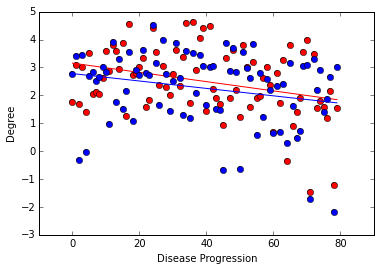

In [29]:
young_g = load_graph(old_neg_mat)
old_g = load_graph(young_neg_mat)

young_deg = young_g.degree(weight='weight').values()
old_deg = old_g.degree(weight='weight').values()

young_xvals, young_yvals, old_xvals, old_yvals = [], [], [], []
for ind in range(len(order)):
    reg = order[ind]
    young_xvals.append(ind)
    young_yvals.append(young_deg[reg])
    old_xvals.append(ind)
    old_yvals.append(old_deg[reg])

ryoung, rold = stats.pearsonr(young_xvals, young_yvals), stats.pearsonr(old_xvals, old_yvals)
print str(ryoung), str(rold)
plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(young_xvals, young_yvals, c='r')
fit = np.polyfit(young_xvals,young_yvals,1)
fit_fn = np.poly1d(fit)
plt.plot(young_xvals, young_yvals, 'ro', young_xvals, fit_fn(young_xvals), 'r')

plt.scatter(old_xvals, old_yvals, c='b')
fit = np.polyfit(old_xvals,old_yvals,1)
fit_fn = np.poly1d(fit)
plt.plot(old_xvals, old_yvals, 'bo', old_xvals, fit_fn(old_xvals), 'b')
plt.xlabel("Disease Progression")
plt.ylabel("Degree")

(-0.20694059770186221, 0.06550535735067424) (-0.18303269056160112, 0.1041435969402759)


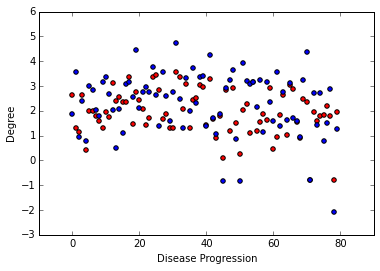

In [29]:
young_g = load_graph(old_pos_mat)
old_g = load_graph(young_pos_mat)

young_deg = young_g.degree(weight='weight').values()
old_deg = old_g.degree(weight='weight').values()

young_xvals, young_yvals, old_xvals, old_yvals = [], [], [], []
for ind in range(len(order)):
    reg = order[ind]
    young_xvals.append(ind)
    young_yvals.append(young_deg[reg])
    old_xvals.append(ind)
    old_yvals.append(old_deg[reg])

ryoung, rold = stats.pearsonr(young_xvals, young_yvals), stats.pearsonr(old_xvals, old_yvals)
print str(ryoung), str(rold)
plt.scatter(young_xvals, young_yvals, c='r')
plt.scatter(old_xvals, old_yvals, c='b')
plt.xlabel("Disease Progression")
plt.ylabel("Degree")

In [ ]:
pos_corrs, neg_corrs = [], []
for match in matches:
    pos_g = load_graph(str(match[0]))
    neg_g = load_graph(str(match[1]))

    pos_deg = pos_g.degree(weight='weight').values()
    neg_deg = neg_g.degree(weight='weight').values()

    pos_xvals, pos_yvals, neg_xvals, neg_yvals = [], [], [], []
    for ind in range(len(order)):
        reg = order[ind]
        pos_xvals.append(ind)
        pos_yvals.append(pos_deg[reg])
        neg_xvals.append(ind)
        neg_yvals.append(neg_deg[reg])
        
    rp, rn = stats.pearsonr(pos_xvals, pos_yvals)[0], stats.pearsonr(neg_xvals, neg_yvals)[0]

    
    pos_corrs.append(rp)
    neg_corrs.append(rn)
# plt.scatter(pos_xvals, pos_yvals, c = 'b')
# plt.scatter(neg_xvals, neg_yvals, c = 'r', alpha = 0.50)
# rp, rn = stats.pearsonr(pos_xvals, pos_yvals), stats.pearsonr(neg_xvals, neg_yvals)
# print "E4+  :  " + str(rp)
# print "E4-  :  " + str(rn)
#     plt.errorbar(ind, np.mean(pos_vals), yerr = np.std(pos_vals), c = 'b')
#     plt.errorbar(ind, np.mean(neg_vals), yerr = np.std(neg_vals), c = 'r')

In [148]:
# More sane variable names
young_neg_paths, old_neg_paths = geno_neg, [str(m[0]) for m in matches[:, 1:2]]
all_neg_paths = young_neg_paths + old_neg_paths
young_pos_paths, old_pos_paths = geno_pos, [str(m[0]) for m in matches[:, 0:1]]
all_pos_paths = young_pos_paths + old_pos_paths

In [149]:
degree_by_reg_neg = {}
total_degree = []
for reg in range(80):
    degree_by_reg_neg[reg] = []

age = []
for path in all_neg_paths:
    ss = get_subsess(path)
    graph = load_graph(str(path))
    age.append(subject_summary[subject_summary.Subsess == ss].values[0][3])
    total_degree.append(sum(graph.degree(weight='weight').values()))
    for reg in range(80):
        degree_by_reg_neg[reg].append(graph.degree(reg, weight='weight'))

In [150]:
for reg in range(80):
    r, p = stats.pearsonr(age, degree_by_reg_neg[reg])
    if p < 0.05:
        print reg, r, p

19 0.354314501695 0.0397875414441
42 0.505736305116 0.00227902723825


0.24144764819
0.168926341922


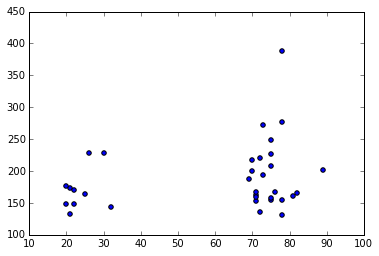

In [151]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(age, total_degree)
r, p = stats.pearsonr(age, total_degree)
print r
print p

In [152]:
degree_by_reg_pos = {}
total_degree = []
for reg in range(80):
    degree_by_reg_pos[reg] = []

age = []
for path in all_pos_paths:
    ss = get_subsess(path)
    graph = load_graph(str(path))
    age.append(subject_summary[subject_summary.Subsess == ss].values[0][3])
    total_degree.append(sum(graph.degree(weight='weight').values()))
    for reg in range(80):
        degree_by_reg_pos[reg].append(graph.degree(reg, weight='weight'))

In [153]:
for reg in range(80):
    r, p = stats.pearsonr(age, degree_by_reg_pos[reg])
    if p < 0.05:
        print reg, r, p

10 -0.400897222646 0.0187888407781
19 0.343258322469 0.0468660969668
22 0.394715233728 0.0208786394155
28 -0.433911279126 0.0103508557393
39 -0.400981935838 0.0187614613592
52 0.541230000234 0.00094871447649


0.218034010559
0.215433987835


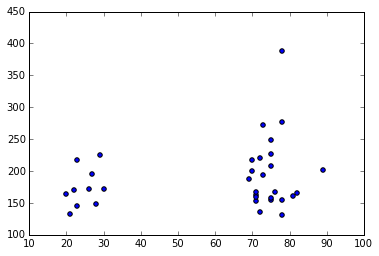

In [115]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(age, total_degree)
r, p = stats.pearsonr(age, total_degree)
print r
print p

In [144]:
bc_by_reg_neg = {}
total_degree = []
for reg in range(80):
    bc_by_reg_neg[reg] = []

age = []
for path in all_neg_paths:
    ss = get_subsess(path)
    graph = load_graph(str(path))
    age.append(subject_summary[subject_summary.Subsess == ss].values[0][3])
    total_degree.append(sum(graph.degree(weight='weight').values()))
    bc = nx.betweenness_centrality(graph, weight='distance').values()
    for reg in range(80):
        bc_by_reg_neg[reg].append(bc[reg])

In [145]:
for reg in range(80):
    r, p = stats.pearsonr(age, bc_by_reg_neg[reg])
    if p < 0.05:
        print reg, r, p

In [146]:
bc_by_reg_pos = {}
total_degree = []
for reg in range(80):
    bc_by_reg_pos[reg] = []

age = []
for path in all_pos_paths:
    ss = get_subsess(path)
    graph = load_graph(str(path))
    age.append(subject_summary[subject_summary.Subsess == ss].values[0][3])
    total_degree.append(sum(graph.degree(weight='weight').values()))
    bc = nx.betweenness_centrality(graph, weight='distance').values()
    for reg in range(80):
        bc_by_reg_pos[reg].append(bc[reg])

In [147]:
for reg in range(80):
    r, p = stats.pearsonr(age, bc_by_reg_pos[reg])
    if p < 0.05:
        print reg, r, p

29 -0.341537681858 0.0480531882379
36 -0.411810187729 0.0155248303065


In [143]:
nx.betweenness_centrality(load_graph(str(all_pos_paths[0])), weight='distance')

{0: 0.01282051282051282,
 1: 0.01282051282051282,
 2: 0.01282051282051282,
 3: 0.01282051282051282,
 4: 0.01282051282051282,
 5: 0.01282051282051282,
 6: 0.01282051282051282,
 7: 0.01282051282051282,
 8: 0.01282051282051282,
 9: 0.01282051282051282,
 10: 0.01282051282051282,
 11: 0.01282051282051282,
 12: 0.01282051282051282,
 13: 0.01282051282051282,
 14: 0.01282051282051282,
 15: 0.01346965271015904,
 16: 0.01346965271015904,
 17: 0.01282051282051282,
 18: 0.01282051282051282,
 19: 0.01436222005842259,
 20: 0.01282051282051282,
 21: 0.01282051282051282,
 22: 0.01282051282051282,
 23: 0.01282051282051282,
 24: 0.01346965271015904,
 25: 0.01282051282051282,
 26: 0.01346965271015904,
 27: 0.01282051282051282,
 28: 0.01282051282051282,
 29: 0.01282051282051282,
 30: 0.01282051282051282,
 31: 0.01282051282051282,
 32: 0.014118792599805257,
 33: 0.013145082765335929,
 34: 0.01282051282051282,
 35: 0.01282051282051282,
 36: 0.01436222005842259,
 37: 0.01282051282051282,
 38: 0.0140376501135

In [164]:
degree_by_reg_neg_young = {}
total_degree_young = []
for reg in range(80):
    degree_by_reg_neg_young[reg] = []

age = []
for path in young_neg_paths:
    ss = get_subsess(path)
    graph = load_graph(str(path))
    age.append(subject_summary[subject_summary.Subsess == ss].values[0][3])
    total_degree_young.append(sum(graph.degree(weight='weight').values()))
    for reg in range(80):
        degree_by_reg_neg_young[reg].append(graph.degree(reg, weight='weight'))

In [165]:
degree_by_reg_neg_old = {}
total_degree_old = []
for reg in range(80):
    degree_by_reg_neg_old[reg] = []

age = []
for path in old_neg_paths:
    ss = get_subsess(path)
    graph = load_graph(str(path))
    age.append(subject_summary[subject_summary.Subsess == ss].values[0][3])
    total_degree_old.append(sum(graph.degree(weight='weight').values()))
    for reg in range(80):
        degree_by_reg_neg_old[reg].append(graph.degree(reg, weight='weight'))

In [166]:
for reg in range(80):
    t, p = stats.ttest_ind(degree_by_reg_neg_young[reg], degree_by_reg_neg_old[reg])
    if p < 0.05:
        print reg, t, p

19 -2.0767012166 0.045941091404
42 -2.98786902402 0.00535795537127


In [196]:
degree_by_reg_pos_young = {}
total_degree_young = []
for reg in range(80):
    degree_by_reg_pos_young[reg] = []

age = []
for path in young_pos_paths:
    ss = get_subsess(path)
    graph = load_graph(str(path))
    age.append(subject_summary[subject_summary.Subsess == ss].values[0][3])
    total_degree_young.append(sum(graph.degree(weight='weight').values()))
    for reg in range(80):
        degree_by_reg_pos_young[reg].append(graph.degree(reg, weight='weight'))

In [197]:
degree_by_reg_pos_old = {}
total_degree_old = []
for reg in range(80):
    degree_by_reg_pos_old[reg] = []

age = []
for path in old_pos_paths:
    ss = get_subsess(path)
    graph = load_graph(str(path))
    age.append(subject_summary[subject_summary.Subsess == ss].values[0][3])
    total_degree_young.append(sum(graph.degree(weight='weight').values()))
    for reg in range(80):
        degree_by_reg_pos_old[reg].append(graph.degree(reg, weight='weight'))

In [198]:
for reg in range(80):
    t, p = stats.ttest_ind(degree_by_reg_pos_young[reg], degree_by_reg_pos_old[reg])
    if p < 0.05:
        print reg, t, p

10 2.34690761097 0.025282427324
19 -2.47007561243 0.0190264636306
22 -2.48545524796 0.0183537478036
28 2.78386737273 0.00894246742805
39 2.39795009975 0.0224923529141
42 -2.38008447738 0.0234353770666
52 -4.04034495529 0.00031265597599
75 -2.15401979801 0.0388737660212


In [199]:
reg_names[52]

array(['ctx-rh-inferiorparietal'], 
      dtype='|S31')

In [170]:
all_young = young_neg_paths + young_pos_paths
degree_by_reg = {}
total_degree_old = []
for reg in range(80):
    degree_by_reg[reg] = []
for path in all_young:
    ss = get_subsess(path)
    graph = load_graph(str(path))
    age.append(subject_summary[subject_summary.Subsess == ss].values[0][3])
    total_degree_young.append(sum(graph.degree(weight='weight').values()))
    for reg in range(80):
        degree_by_reg[reg].append(graph.degree(reg, weight='weight'))

In [201]:
pos_pib_dat, neg_pib_dat = np.load('/home/jagust/dino/surf/mats/ignore_pib_pos/pos_pib_dat.npy'), np.load('/home/jagust/dino/surf/mats/ignore_pib_pos/neg_pib_dat.npy')

In [202]:
# # Transform values to z-scores
for r in range(len(pos_pib_dat)):
    pos_pib_dat[r] = [float(val) for val in pos_pib_dat[r]]
    mean, std = np.mean(pos_pib_dat[r]), np.std(pos_pib_dat[r])
    pos_pib_dat[r] = [((val - mean) * 1.0 / std) for val in pos_pib_dat[r]]

    
for r in range(len(neg_pib_dat)):
    neg_pib_dat[r] = [float(val) for val in neg_pib_dat[r]]
    mean, std = np.mean(neg_pib_dat[r]), np.std(neg_pib_dat[r])
    neg_pib_dat[r] = [((val - mean) * 1.0 / std) for val in neg_pib_dat[r]]

pos_reg_pib_vals, neg_reg_pib_vals = {}, {}
for reg in range(80):
    pos_vals = pos_pib_dat[:,reg:reg+1]
    neg_vals = neg_pib_dat[:,reg:reg+1]
    
    pos_list = [float(i[0]) for i in pos_vals if i == i]
    neg_list = [float(i[0]) for i in neg_vals if i == i]
   
    pos_reg_pib_vals[reg] = np.mean(pos_list)
    neg_reg_pib_vals[reg] = np.mean(neg_list)

In [209]:
degree_by_reg_neg_young = {}
total_degree_young = []
for reg in range(80):
    degree_by_reg_neg_young[reg] = []
for path in young_neg_paths:
    ss = get_subsess(path)
    graph = load_graph(str(path))
    for reg in range(80):
        degree_by_reg_neg_young[reg].append(graph.degree(reg, weight='weight'))
hub, best = 'a', 0
for reg in range(80):
    degree_by_reg_neg_young[reg] = np.mean(degree_by_reg_neg_young[reg])
    if degree_by_reg_neg_young[reg] > best:
        best = degree_by_reg_neg_young[reg]
        hub = reg
        
print reg_names[reg]

['ctx-rh-insula']


In [188]:
degree_by_reg_pos_young = {}
total_degree_young = []
for reg in range(80):
    degree_by_reg_pos_young[reg] = []
for path in young_pos_paths:
    ss = get_subsess(path)
    graph = load_graph(str(path))
    for reg in range(80):
        degree_by_reg_pos_young[reg].append(graph.degree(reg, weight='weight'))
for reg in range(80):
    degree_by_reg_pos_young[reg] = np.mean(degree_by_reg_pos_young[reg])

E4 Negative: 
r: 0.107431253492
p: 0.342864747939
E4 Positive: 
r: 0.0458140232852
p: 0.686554059187


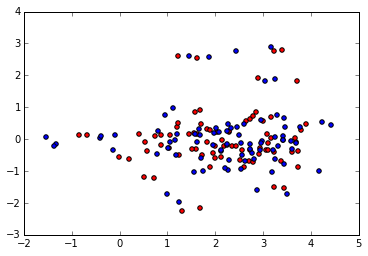

In [193]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(degree_by_reg_neg_young.values(), neg_reg_pib_vals.values(), c = 'r')
r, p = stats.pearsonr(degree_by_reg_neg_young.values(), neg_reg_pib_vals.values())
print "E4 Negative: "
print "r: " + str(r)
print "p: " + str(p)
plt.scatter(degree_by_reg_pos_young.values(), pos_reg_pib_vals.values())
r, p = stats.pearsonr(degree_by_reg_pos_young.values(), pos_reg_pib_vals.values())
print "E4 Positive: "
print "r: " + str(r)
print "p: " + str(p)

0.0458140232852
0.686554059187


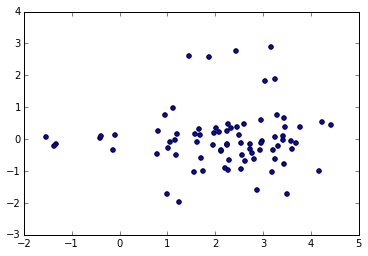

In [192]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(degree_by_reg_pos_young.values(), pos_reg_pib_vals.values())
r, p = stats.pearsonr(degree_by_reg_pos_young.values(), pos_reg_pib_vals.values())
print r
print p

In [217]:
graph.edges()

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),

In [179]:
# for reg in range(80):
#     degree_by_reg[reg] = np.mean(degree_by_reg[reg])
# degrees = sort_by_val(degree_by_reg)
# degrees[::-1]
# reg_names = np.load('reg_names.npy')
# for reg in degrees:
#     print reg_names[reg[0]]

In [171]:
def sort_by_val(d):
    ''' Sort a dictionary by value
    
    Parameters
    ----------
    d : a dictionary
    
    Returns
    -------
    l : a list of key-value pairs in tuples 
    '''
    l = sorted(d.items(), key = operator.itemgetter(1))
    return l

In [9]:
def find_subsess(path):
    ''' Given a path or string, finds the subuject's subsession'''
    inds = re.search('B[0,1,9]\d-\d\d\d_\d\d\d\d-\d\d-\d\d', path)
    if inds is None:
        print 'Subject ID not found'
        return None
    else:
        inds = inds.span()
        return path[inds[0]: inds[1]]

Does Spatial Patterning of of amyloid-B relate to the functional network?
==

In [228]:
pos_pib, neg_pib = np.load('pos_pib_dat.npy'), np.load('neg_pib_dat.npy')
group_pib = np.vstack((pos_pib, neg_pib))

In [231]:
pib_vals = pd.DataFrame(group_pib, dtype = float)
corr_mat = np.array(pib_vals.corr())
np.fill_diagonal(corr_mat, 0.0)
pib_g = nx.Graph(corr_mat)

In [232]:
# Find seed
add_distance_attr(pib_g)
pib_degs = pib_g.degree(weight='weight')
sorted_degs = sort_by_val(pib_degs)[::-1]
seed = sorted_degs[0][0]
seed

74

In [243]:
# removed = [seed]
# while len(removed) < 80:
#     print len(removed)
#     rem = find_next_node(removed, pib_g)
#     removed.append(rem)
# removed

In [319]:
# old_g = nx.Graph(old_mat)
# add_distance_attr(old_g)
# trav = [seed]
# while len(trav) < 80:
#     print len(trav)
#     rem = find_next_node(trav, old_g)
#     trav.append(rem)

In [280]:
# young_g = nx.Graph(young_mat)
# add_distance_attr(young_g)
# visited = [seed]
# while len(visited) < 80:
#     print len(visited)
#     rem = find_next_node(visited, young_g)
#     visited.append(rem)
# visited
pib_order, fnet_order = range(80), range(80)
for reg in range(80):
#     for indr in range(len(removed)):
#         if removed[indr] == reg:
#             if reg == 74:
#                 print indr
#             pib_order[reg] = indr
    for indv in range(len(visited)):
        if visited[indv] == reg:
            if reg == 74:
                print indv
            fnet_order[reg] == indv

0


In [1]:
# neg_corrs = []
# for path in old_neg_paths:
#     print find_id(path)
#     graph = nx.Graph(np.load(path))
#     add_distance_attr(graph)
#     trav = [seed]
#     while len(trav) < 80:
#         print len(trav)
#         rem = find_next_node(trav, graph)
#         trav.append(rem)
#     xlist, ylist = [], []
#     for reg in range(80):
#         x, y = trav.index(reg), removed.index(reg)
#         ylist.append(y)
#         xlist.append(x)
#     r, p = stats.pearsonr(xlist, ylist)
#     neg_corrs.append((r, p))
#     np.save('/home/jagust/dino/surf/simulation_trials/ignore_pib_pos/%s_func_net_traversal.npy' % (find_id(path)), np.array(trav))

# pos_corrs = []
# for path in old_pos_paths:
#     print find_id(path)
#     graph = nx.Graph(np.load(path))
#     add_distance_attr(graph)
#     trav = [seed]
#     while len(trav) < 80:
#         print len(trav)
#         rem = find_next_node(trav, graph)
#         trav.append(rem)
#     xlist, ylist = [], []
#     for reg in range(80):
#         x, y = trav.index(reg), removed.index(reg)
#         ylist.append(y)
#         xlist.append(x)
#     r, p = stats.pearsonr(xlist, ylist)
#     pos_corrs.append((r,p))
#     np.save('/home/jagust/dino/surf/simulation_trials/ignore_pib_pos/%s_func_net_traversal.npy' % (find_id(path)), np.array(trav))

In [326]:
young_neg_corrs = []
for path in young_neg_paths:
    print find_id(path)
    graph = nx.Graph(np.load(path))
    add_distance_attr(graph)
    trav = [seed]
    while len(trav) < 80:
        print len(trav)
        rem = find_next_node(trav, graph)
        trav.append(rem)
    xlist, ylist = [], []
    for reg in range(80):
        x, y = trav.index(reg), removed.index(reg)
        ylist.append(y)
        xlist.append(x)
    r, p = stats.pearsonr(xlist, ylist)
    young_neg_corrs.append((r, p))
    np.save('/home/jagust/dino/surf/simulation_trials/ignore_pib_pos/%s_func_net_traversal.npy' % (find_id(path)), np.array(trav))
    
young_pos_corrs = []
for path in young_pos_paths:
    print find_id(path)
    graph = nx.Graph(np.load(path))
    add_distance_attr(graph)
    trav = [seed]
    while len(trav) < 80:
        print len(trav)
        rem = find_next_node(trav, graph)
        trav.append(rem)
    xlist, ylist = [], []
    for reg in range(80):
        x, y = trav.index(reg), removed.index(reg)
        ylist.append(y)
        xlist.append(x)
    r, p = stats.pearsonr(xlist, ylist)
    young_pos_corrs.append((r, p))
    np.save('/home/jagust/dino/surf/simulation_trials/ignore_pib_pos/%s_func_net_traversal.npy' % (find_id(path)), np.array(trav))

B07-226
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
B07-254
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
B07-261
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
B07-262
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
B07-263
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


NameError: name 'visited' is not defined

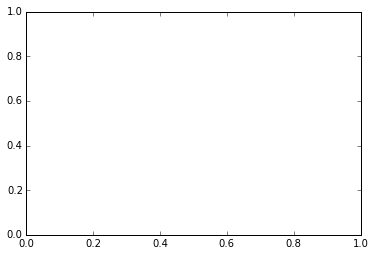

In [30]:
plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
xlist, ylist, xlistold = [], [], []
for reg in range(80):
    x, y, xold = visited.index(reg), removed.index(reg), trav.index(reg)
    xlist.append(x)
    ylist.append(y)
    xlistold.append(xold)
#     plt.scatter(x, y)
#     plt.scatter(xold, y, c = 'r')
# plt.scatter(fnet_order, pib_order)
fit = np.polyfit(xlist,ylist,1)
fit_fn = np.poly1d(fit) 
plt.plot(xlist, ylist, 'bo', xlist, fit_fn(xlist), '--k')


fit = np.polyfit(xlistold,ylist,1)
fit_fn = np.poly1d(fit) 
plt.plot(xlistold, ylist, 'ro', xlistold, fit_fn(xlistold), '--k')
r, p = stats.pearsonr(xlist, ylist)
plt.xlabel('Order in Functional Network')
plt.ylabel('Order in PiB Network Traversal')
print 'Young'
print 'r: ' + str(r)
print 'p: ' + str(p)

r, p = stats.pearsonr(xlistold, ylist)
print 'Old'
print 'r: ' + str(r)
print 'p: ' + str(p)
ax.annotate('r: ' + str(r), xy=(79, 40))
ax.annotate('r: ' + str(stats.pearsonr(xlist, ylist)[0]), xy=(79, 50))

Old
r: -0.0482653539616
p: 0.670725812688


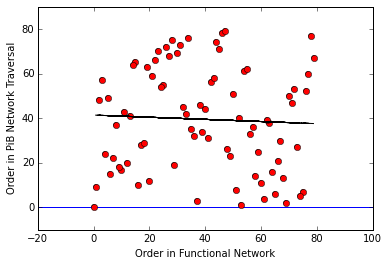

In [305]:
plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
xlist, ylist, xlistold = [], [], []
for reg in range(80):
    x, y, xold = visited.index(reg), removed.index(reg), trav.index(reg)
    ylist.append(y)
    xlistold.append(xold)
plt.scatter(xlistold, ylist, c = 'r')
plt.xcorr(xlistold, ylist)
r, p = stats.pearsonr(xlistold, ylist)
plt.xlabel('Order in Functional Network')
plt.ylabel('Order in PiB Network Traversal')

fit = np.polyfit(xlistold,ylist,1)
fit_fn = np.poly1d(fit) 
plt.plot(xlistold, ylist, 'ro', xlistold, fit_fn(xlistold), '--k')
print 'Old'
print 'r: ' + str(r)
print 'p: ' + str(p)

In [263]:
def init_fig():
    plt.figure()
    fig = plt.figure()
    ax = fig.add_subplot(111)

In [252]:
pib_mat = np.load('/home/jagust/dino/surf/mats/pib_mat.npy')
pib_g = nx.Graph(pib_mat)
add_distance_attr(pib_g)

ValueError: negative number cannot be raised to a fractional power

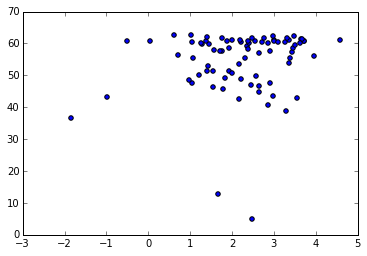

In [257]:
plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(young_g.degree(weight='weight').values(), pib_g.degree(weight='weight').values())
r, p = stats.pearsonr(nx.clustering(young_g, weight='weight').values(), nx.clustering(pib_g, weight='weight').values())
print r
print p

In [256]:
nx.betweenness_centrality(young_g, weight='distance').values()

[0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.01282051282051282,
 0.0128205

In [238]:
def find_next_node(r, g):
    """ Slight variation of Prim's Algorithm; instead of minimizing the total 
    """
    nodes = g.nodes()
    distance = {}
    for node in nodes:
        if node in r:
            continue
        distance[node] = 0.0
        for removed in r:
            distance[node] += nx.shortest_path_length(g, node, removed, weight='distance') 
        sorted_distances = sort_by_val(distance)
    return sorted_distances[0][0]